In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
import matplotlib.pyplot as plt2


import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
city_data.head()

ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()
#city_data.head()



,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [2]:
# COmbine the dataset and also reset the index.
city_ride_data = pd.merge(ride_data,city_data,how = "inner")
city_ride_data.head(500)
city_ride_unique = city_ride_data.drop_duplicates(["city","driver_count","type"])
city_ride_unique = city_ride_unique.reset_index(drop=True)
city_ride_unique.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
# delete unwanted columns

city_ride_data.head()
# Find average, Driver Count and City details ina new data frame.
#g1 = df1.groupby( [ "Name", "City"] ).count()

#agg_city_ride_data = city_ride_data.groupby([city_ride_data("driver_count").agg(),city_ride_data("fare").mean(),city_ride_data("type").mean()])
#agg_city_ride_data = city_ride_data.groupby([["driver_count"].count(),["fare"].mean(),["type"].first()]
agg_city_ride_data =  city_ride_data.groupby(["type","city"],as_index=False).agg({'ride_id':'count', 'fare':'mean','driver_count':'first'})
agg_city_ride_data.head(500)

#del city_ride_data["date"]
#del city_ride_data["city"]
#del city_ride_data["ride_id"]


,type,city,ride_id,fare,driver_count
0,Rural,Bradshawfurt,10,40.064000,7
1,Rural,Garzaport,3,24.123333,7
2,Rural,Harringtonfort,6,33.470000,4
3,Rural,Jessicaport,6,36.013333,1
4,Rural,Lake Jamie,6,34.358333,4
5,Rural,Lake Latoyabury,11,26.061818,2
6,Rural,Michaelberg,12,34.997500,6
7,Rural,New Ryantown,6,43.278333,2
8,Rural,Newtonview,4,36.745000,1
9,Rural,North Holly,9,29.130000,8


## Bubble Plot of Ride Sharing Data

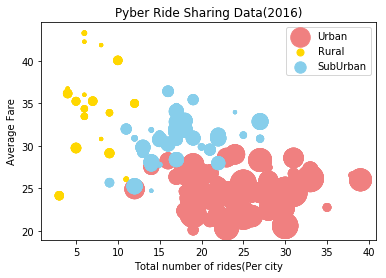

In [4]:
# Obtain the x and y coordinates for each of the three city types
ride_type_urban = agg_city_ride_data.loc[agg_city_ride_data["type"]=="Urban"]
ride_type_rural = agg_city_ride_data.loc[agg_city_ride_data["type"]=="Rural"]
ride_type_suburban = agg_city_ride_data.loc[agg_city_ride_data["type"]=="Suburban"]
#print(ride_type_urban)
#need only count and average fare

ride_type_urban.head()                                                          

plt.plot(style="o", ms=3)

a=plt.scatter([ride_type_urban['ride_id'] for data in ride_type_urban], \
    [ride_type_urban['fare'] for data in ride_type_urban],s=[ride_type_urban['driver_count']*10 for data in ride_type_urban],marker="o",  c='lightcoral', alpha=1.0)      
b=plt.scatter([ride_type_rural['ride_id'] for data in ride_type_rural], \
    [ride_type_rural['fare'] for data in ride_type_rural],s=[ride_type_rural['driver_count']*10 for data in ride_type_rural],marker="o", label ="Rural", c='gold', alpha=1.0)     
c=plt.scatter([ride_type_suburban['ride_id'] for data in ride_type_suburban], \
    [ride_type_suburban['fare'] for data in ride_type_suburban],s=[ride_type_suburban['driver_count']*10 for data in ride_type_suburban] ,label ="Suburban",marker="o",c='skyblue', alpha=1.0)     

                            
# Set the xlabel and ylabel using class method
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total number of rides(Per city")
plt.ylabel("Average Fare")
#plt.tight_layout()
plt.savefig("11.png")
plt.legend(['Urban','Rural','SubUrban'])
plt.show()                                                                                                                                                                                      

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [5]:
# Show plot
plt.show()

## Total Fares by City Type

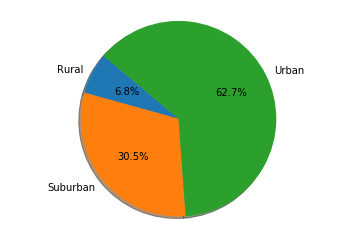

In [6]:


# Calculate Type Percents
agg_city_ride_data1 =  city_ride_data.groupby(["type"],as_index=False).agg({'fare':'sum','driver_count':'first'})
agg_city_ride_data1.head(500)
#plt1.title('Percentage of Total Fares by City Type')
plt2.title ='Percentage of Total Fares by City Type'
plt2.pie(agg_city_ride_data1["fare"], labels=agg_city_ride_data1["type"],
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt2.axis("equal")
# Save an image of our chart and print the final product to the screen
plt2.savefig("../Images/PyPies.png")

plt2.show()


In [7]:
# Show Figure
plt.show()

## Total Rides by City Type

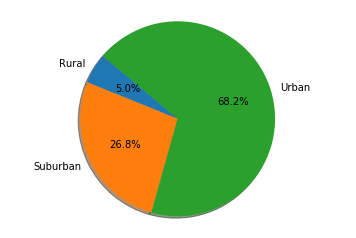

In [8]:

# Calculate Driver Percents
# Calculate Ride Percents

# Build Pie Chart

# Save Figure

# Calculate Type Percents
agg_city_ride_data2 =  city_ride_data.groupby(["type"],as_index=False).agg({'ride_id':'sum','driver_count':'first'})
agg_city_ride_data2.head(500)
#plt1.title("Percentage of Total Rides by City Type")

plt1.pie(agg_city_ride_data2["ride_id"], labels=agg_city_ride_data2["type"],
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt1.axis("equal")
# Save an image of our chart and print the final product to the screen

plt1.savefig("../Images/PyPies2.png")

plt1.show()

# Build Pie Charts

# Save Figure



In [9]:
# Show Figure
plt.show()

## Total Drivers by City Type

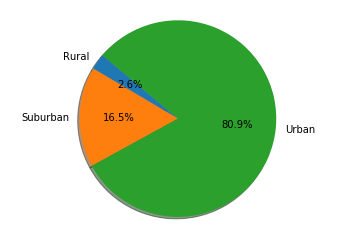

In [10]:
# Calculate Driver Percents
# Calculate Ride Percents

# Build Pie Chart

# Save Figure

# Calculate Type Percents
agg_city_ride_data2 =  city_ride_unique.groupby(["type"],as_index=False).agg({'driver_count':'sum'})
agg_city_ride_data2.head(500)
#plt1.title("Percentage of Total Rides by City Type")

plt1.pie(agg_city_ride_data2["driver_count"], labels=agg_city_ride_data2["type"],
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt1.axis("equal")
# Save an image of our chart and print the final product to the screen

plt1.savefig("../Images/PyPies2.png")

plt1.show()

# Build Pie Charts

# Save Figure


In [11]:
# Show Figure
plt.show()

Observation:
1. Average fares are higher in the rural area followed by Surban and then to Urban.
2. As expected the number of rides are higher in Urban compared to Suburban and Rural areas.
3. As expected, the count of drivers is highest in the urban areas followed by Suburban and Rural.


